<a href="https://colab.research.google.com/github/DeveshGund1403/CognifyzTechnologies_ML-Internship/blob/main/Restraunt_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/Dataset .csv"
restaurant_data = pd.read_csv(file_path)


# Display the first few rows of the dataset
print(restaurant_data.head())

# Check for missing values
print(restaurant_data.isnull().sum())

# Check unique values for each column
print(restaurant_data['Cuisines'].unique())
print(restaurant_data['Price range'].unique())
print(restaurant_data['City'].unique())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [2]:
# Drop rows with missing values
restaurant_data.dropna(inplace=True)

restaurant_data['City'] = restaurant_data['City'].str.strip().str.title()

restaurant_data['Price range'] = restaurant_data['Price range'].astype(int)

# Save cleaned dataset
cleaned_file_path = "/content/Cleaned_Dataset 1.csv"
restaurant_data.to_csv(cleaned_file_path, index=False)

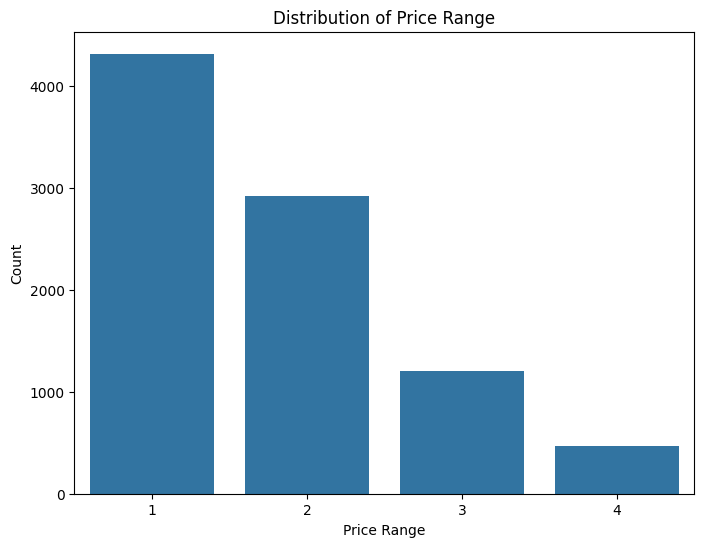

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load the dataset
restaurant_data = pd.read_csv("/content/Cleaned_Dataset 1.csv")

restaurant_data.dropna(inplace=True)

restaurant_data['features'] = restaurant_data['Cuisines'] + ' ' + restaurant_data['City']

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(restaurant_data['features'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def recommend_restaurants(user_preferences, cosine_sim=cosine_sim):

    filtered_restaurants = restaurant_data.copy()
    for criterion, value in user_preferences.items():
        if criterion in filtered_restaurants.columns:
            filtered_restaurants = filtered_restaurants[filtered_restaurants[criterion] == value]

    indices = filtered_restaurants.index.tolist()

    sim_scores = list(enumerate(cosine_sim[indices]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    top_indices = [x[0] for x in sim_scores[1:6]]
    recommendations = restaurant_data.iloc[top_indices]

    return recommendations

plt.figure(figsize=(8, 6))
sns.countplot(data=restaurant_data, x='Price range')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()
